In [1]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
# Cargar el Data Set
noticias_2gpos = fetch_20newsgroups(categories=['rec.sport.baseball', 'rec.autos'], subset="all")

In [4]:
type(noticias_2gpos)

sklearn.utils._bunch.Bunch

In [5]:
len(noticias_2gpos.data)

1984

In [6]:
noticias_2gpos.target

array([0, 0, 0, ..., 0, 1, 1], shape=(1984,))

In [7]:
# El GRAN dataset
X = noticias_2gpos.data
y = noticias_2gpos.target

In [8]:
print(len(X), len(y))

1984 1984


In [9]:
from pandas import DataFrame

In [10]:
df = DataFrame(
    {"Noticia": X,
     "Etiqueta": y}
)

In [11]:
df.head()

,Noticia,Etiqueta
0,From: cf947@cleveland.Freenet.Edu (Chun-Hung W...,0
1,From: tommy@boole.att.com (Tommy Reingold)\nSu...,0
2,From: bob1@cos.com (Bob Blackshaw)\nSubject: R...,0
3,From: eliot@lanmola.engr.washington.edu (eliot...,0
4,From: gregl@zimmer.CSUFresno.EDU (Greg Lewis)\...,0


In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizador = TfidfVectorizer(stop_words=stopwords.words("english"))
X_vect = vectorizador.fit_transform(df.Noticia)

In [13]:
X_vect

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 206649 stored elements and shape (1984, 23633)>

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=.3, random_state=42)

In [25]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [ ]:
# print(len(X_train), len(X_test), len(y_train), len(y_test))

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [24]:
y_train

array([0, 0, 1, ..., 1, 0, 1], shape=(1388,))

In [26]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
y_pred = clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Score: 98.99%


---
# ESTO YA NO PERTENECE AL SEGUNDO PARCIAL
Vamos a probar con otros kernels 

In [29]:
clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Score: 98.83%


In [30]:
clf = SVC(kernel="poly")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Score: 96.64%


In [31]:
clf = SVC(kernel="sigmoid")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Score: 98.99%


In [32]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [34]:
noticias_2gpos.target_names

['rec.autos', 'rec.sport.baseball']

In [39]:
def predecir_categoria(text):
    text_vec = vectorizador.transform([text])
    prediccion = clf.predict(text_vec)
    return noticias_2gpos.target_names[prediccion[0]]


# Ejemplo de uso
text = "There was a flurry of action in the night games as well. No. 6 Alabama took care of business in their rivalry game with No. 11 Tennessee on the third Saturday in October as Ty Simpson put forward another strong showing. No. 13 Notre Dame also handled a tough home game in dispatching No. 20 USC. In the last matchup featuring ranked teams, No. 15 BYU beat No. 23 Utah in the \"Holy War.\""
predecir_categoria(text)

'rec.sport.baseball'

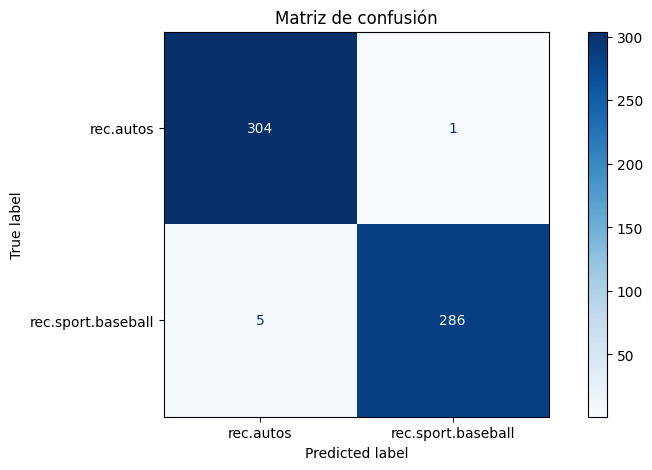

In [43]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="Blues")
ax.xaxis.set_ticklabels(noticias_2gpos.target_names)
ax.yaxis.set_ticklabels(noticias_2gpos.target_names)
ax.set_title("Matriz de confusión")
plt.show()